In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline


In [22]:
train = pd.read_csv('project/train_users_2.csv')
test = pd.read_csv('project/test_users.csv')
#gender = pd.read_csv('project/age_gender_bkts.csv')
sessions = pd.read_csv('project/sessions.csv')
countries= pd.read_csv('project/countries.csv')
train = train.dropna()
test = test.dropna()

In [23]:
from datetime import datetime 
current_year = datetime.now().year
val = train.age.values
train['age'] = np.where(np.logical_and(val>1920, val<2008), current_year-val, val)
train['age'] = np.where(np.logical_or(val<10, val>100), np.nan, val)

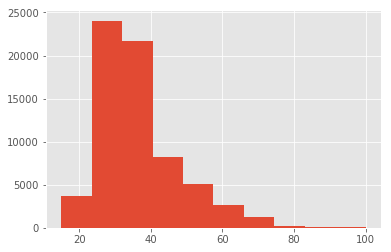

In [24]:
train.age.hist(bins=10)

In [25]:
gender_val = train.gender.values
train['gender'] = np.where(gender_val=='-unknown-', 'OTHER', gender_val)

In [26]:
# plt.hist(list(train['gender']))

In [27]:
train['gender'].describe()

count      68171
unique         3
top       FEMALE
freq       29863
Name: gender, dtype: object

In [52]:
train = pd.read_csv('project/train_users_2.csv')
train.timestamp_first_active[0]

20090319043255

In [53]:
col = train.timestamp_first_active
year= [int(str(col[i])[:4]) for i in range(len(col))]
month= [int(str(col[i])[4:6]) for i in range(len(col))]
date = [int(str(col[i])[4:8]) for i in range(len(col))]
hour = [int(str(col[i])[8:10]) for i in range(len(col))]
minn = [int(str(col[i])[10:12]) for i in range(len(col))]
secs = [int(str(col[i])[12:]) for i in range(len(col))]

In [54]:
train.drop('timestamp_first_active', axis=1, inplace=True)

In [58]:
browser_type = train.first_browser
train.first_browser = np.where(browser_type=='-unknown-', 'OTHER', browser_type)

In [59]:
from collections import Counter
dict1 = Counter(train.signup_method)

Counter({'basic': 152897, 'facebook': 60008, 'google': 546})


([<matplotlib.axis.XTick at 0x2c20167d9e8>,
 <a list of 3 Text xticklabel objects>)

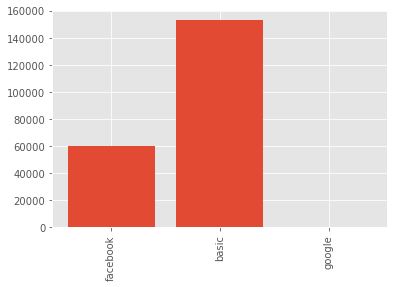

In [60]:
y=list(dict1.values())
x=list(dict1.keys())
print(dict1)
plt.bar(range(len(x)), y, align='center')
plt.xticks(range(len(x)), x, rotation=90)

In [61]:
train.drop('date_first_booking', axis=1, inplace=True)